In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [102]:
df = pd.read_csv("final_cleaned_data.csv", sep=';')
df['Date'] = pd.to_datetime(df['Date'])
audio_features = df.groupby('id')[[ 'Energy','Valence']].first().reset_index()

In [103]:
audio_features

,id,Energy,Valence
0,000xQL6tZNLJzIrtIgxqSl,0.627,0.524
1,003VDDA7J3Xb2ZFlNx7nIZ,0.578,0.190
2,003eoIwxETJujVWmNFMoZy,0.755,0.437
3,003vvx7Niy0yvhvHt4a68B,0.911,0.236
4,00B7TZ0Xawar6NZ00JFomN,0.625,0.665
...,...,...,...
9156,7zjEyeBsaw9gV0jofJLfOM,0.313,0.765
9157,7zl7kehxesNEo2pYkKXTSe,0.730,0.848
9158,7znO2T2deQ7nZUbyxEAMDB,0.535,0.073
9159,7zvfDihYiJ8RQ1nRcpKBF5,0.530,0.258


In [104]:


inertia_2_features = []
K = np.arange(1,11)
for k in K:
 kmeanModel = KMeans(n_clusters=k, n_init = 10, random_state = 42).fit(audio_features[['Valence', 'Energy']])
 kmeanModel.fit(audio_features[['Valence','Energy']])
 inertia_2_features.append(kmeanModel.inertia_)

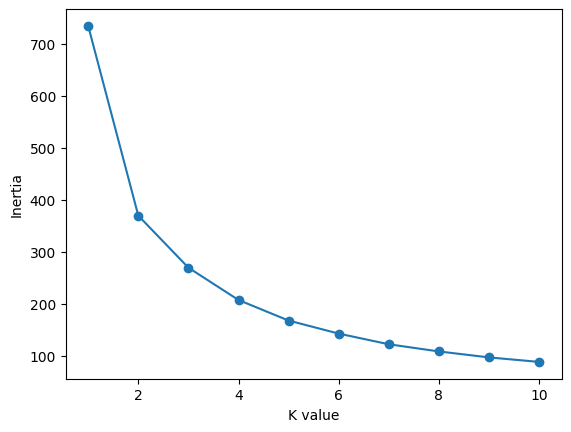

In [105]:
fig,ax = plt.subplots(1,1)
# Create a line plot
ax.plot(K, inertia_2_features, marker='o', linestyle='-')
ax.set_xlabel('K value')
ax.set_ylabel('Inertia')
# Show the plot
plt.show()

K = 3

In [106]:
k_means_3_2_feature = KMeans(n_clusters=3, n_init=10, random_state=42)
audio_features['cluster_3_2_feature'] = k_means_3_2_feature.fit_predict(audio_features[['Valence', 'Energy']])
tracks_clustered = audio_features.reset_index(drop=True)

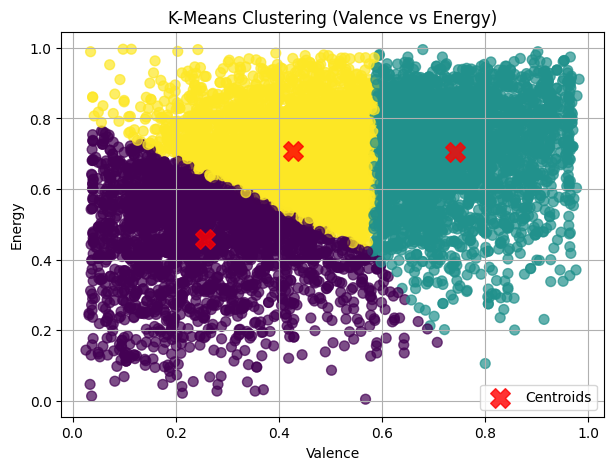

In [107]:
plt.figure(figsize=(7, 5))
plt.scatter(tracks_clustered['Valence'], tracks_clustered['Energy'],
            c=tracks_clustered['cluster_3_2_feature'], cmap='viridis', s=50, alpha=0.7)
centers_3_2_feature = k_means_3_2_feature.cluster_centers_
plt.scatter(centers_3_2_feature[:, 0], centers_3_2_feature[:, 1], 
            c='red', s=200, alpha=0.8, marker='X', label='Centroids')

plt.title('K-Means Clustering (Valence vs Energy)')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()

In [108]:
centers_3_2_feature

array([[0.25766285, 0.45987362],
       [0.74043712, 0.70456415],
       [0.42810232, 0.70851191]])

In [109]:
print("\nCluster Centers (Original Scale):")
for i, center_3 in enumerate(centers_3_2_feature):
    print(f"Cluster {i}: Energy={center_3[0]:.3f}, Valence={center_3[1]:.3f}")
 
print("\nNumber of items in each cluster:")
print(tracks_clustered['cluster_3_2_feature'].value_counts())


Cluster Centers (Original Scale):
Cluster 0: Energy=0.258, Valence=0.460
Cluster 1: Energy=0.740, Valence=0.705
Cluster 2: Energy=0.428, Valence=0.709

Number of items in each cluster:
cluster_3_2_feature
2    3393
1    3148
0    2620
Name: count, dtype: int64


K = 4

In [110]:
k_means_4_2_feature = KMeans(n_clusters=4, n_init = 10 , random_state =42)
audio_features['cluster_4_2_feature'] = k_means_4_2_feature.fit_predict(audio_features[['Valence', 'Energy']])
tracks_clustered = audio_features.reset_index(drop=True)

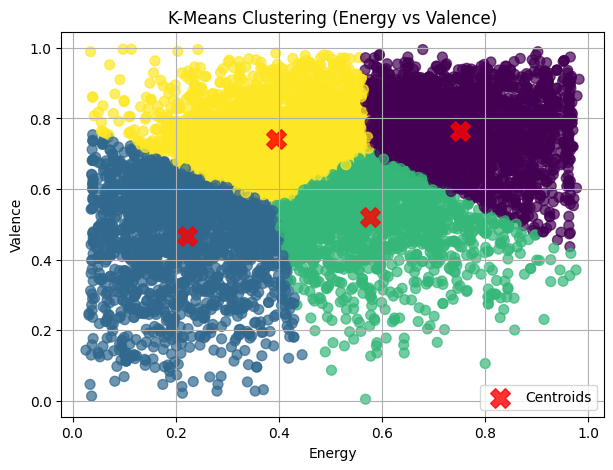

In [111]:
plt.figure(figsize=(7, 5))
plt.scatter(tracks_clustered['Valence'], tracks_clustered['Energy'],
            c=tracks_clustered['cluster_4_2_feature'], cmap='viridis', s=50, alpha=0.7)
centers_4_2_feature = k_means_4_2_feature.cluster_centers_
plt.scatter(centers_4_2_feature[:, 0], centers_4_2_feature[:, 1], 
            c='red', s=200, alpha=0.8, marker='X', label='Centroids')
 
plt.title('K-Means Clustering (Energy vs Valence)')
plt.xlabel('Energy')
plt.ylabel('Valence')
plt.legend()
plt.grid(True)
plt.show()


In [112]:
print("\nCluster Centers (Original Scale):")
for i, center_4 in enumerate(centers_4_2_feature):
    print(f"Cluster {i}: Energy={center_4[0]:.3f}, Valence={center_4[1]:.3f}")
 
print("\nNumber of items in each cluster:")
print(tracks_clustered['cluster_4_2_feature'].value_counts())


Cluster Centers (Original Scale):
Cluster 0: Energy=0.751, Valence=0.763
Cluster 1: Energy=0.222, Valence=0.466
Cluster 2: Energy=0.577, Valence=0.521
Cluster 3: Energy=0.394, Valence=0.743

Number of items in each cluster:
cluster_4_2_feature
3    2575
0    2500
1    2239
2    1847
Name: count, dtype: int64


In [113]:
silhouette_3 = silhouette_score(tracks_clustered[['Valence', 'Energy']], audio_features['cluster_3_2_feature'])
silhouette_4 = silhouette_score(tracks_clustered[['Valence', 'Energy']], audio_features['cluster_4_2_feature'])
print(f'Silhouette Score for K=3 {silhouette_3}')
print(f'Silhouette Score for K=4 {silhouette_4}')



Silhouette Score for K=3 0.34683975281780677
Silhouette Score for K=4 0.35841423329656485


Check median for both Valence and Energy

In [115]:
print(f'Valence Mean : {np.mean(tracks_clustered[['Valence']])}')
print(f'Energy Mean : {np.mean(tracks_clustered[['Energy']])}')

Valence Mean : 0.48646523305316014
Energy Mean : 0.6360761925553979


Check whether is it true or not for k =4

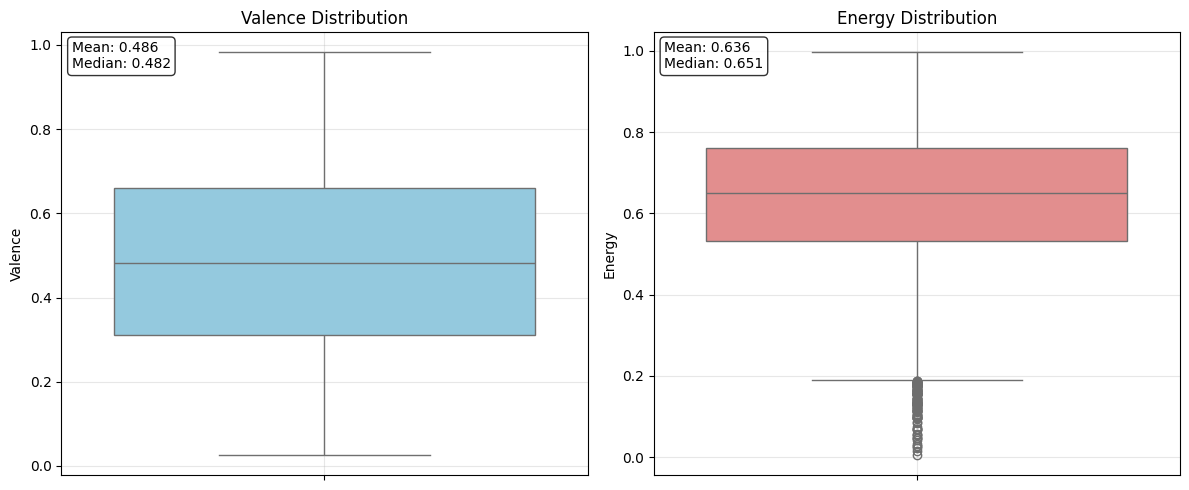

OUTLIER ANALYSIS FOR VALENCE AND ENERGY

Valence:
  Mean: 0.4865
  Median: 0.4820
  Q1 (25%): 0.3100
  Q3 (75%): 0.6600
  IQR: 0.3500
  Lower bound: -0.2150
  Upper bound: 1.1850
  Outliers count: 0
  Outliers percentage: 0.00%

Energy:
  Mean: 0.6361
  Median: 0.6510
  Q1 (25%): 0.5320
  Q3 (75%): 0.7610
  IQR: 0.2290
  Lower bound: 0.1885
  Upper bound: 1.1045
  Outliers count: 128
  Outliers percentage: 1.40%
  Outlier range: 0.0050 to 0.1880


In [117]:
def create_box_plots(tracks_clustered):
    """
    Create simple box plots for Valence and Energy to identify outliers

    Parameters:
    tracks_clustered (pandas.DataFrame): DataFrame containing 'Valence' and 'Energy' columns
    """

    # Set up the figure with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Box plot for Valence
    sns.boxplot(y=tracks_clustered["Valence"], ax=axes[0], color="skyblue")
    axes[0].set_title("Valence Distribution")
    axes[0].set_ylabel("Valence")
    axes[0].grid(True, alpha=0.3)

    # Add statistics text for Valence
    valence_mean = tracks_clustered["Valence"].mean()
    valence_median = tracks_clustered["Valence"].median()
    axes[0].text(
        0.02,
        0.98,
        f"Mean: {valence_mean:.3f}\nMedian: {valence_median:.3f}",
        transform=axes[0].transAxes,
        verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
    )

    # Box plot for Energy
    sns.boxplot(y=tracks_clustered["Energy"], ax=axes[1], color="lightcoral")
    axes[1].set_title("Energy Distribution")
    axes[1].set_ylabel("Energy")
    axes[1].grid(True, alpha=0.3)

    # Add statistics text for Energy
    energy_mean = tracks_clustered["Energy"].mean()
    energy_median = tracks_clustered["Energy"].median()
    axes[1].text(
        0.02,
        0.98,
        f"Mean: {energy_mean:.3f}\nMedian: {energy_median:.3f}",
        transform=axes[1].transAxes,
        verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
    )

    plt.tight_layout()
    plt.savefig(
        "/Users/pirawatwareetanyarat/Documents/test_glm/analysis/valence_energy_boxplots.png",
        dpi=300,
        bbox_inches="tight",
    )
    plt.show()

    # Print outlier information
    print("=" * 50)
    print("OUTLIER ANALYSIS FOR VALENCE AND ENERGY")
    print("=" * 50)

    for feature in ["Valence", "Energy"]:
        Q1 = tracks_clustered[feature].quantile(0.25)
        Q3 = tracks_clustered[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = tracks_clustered[
            (tracks_clustered[feature] < lower_bound)
            | (tracks_clustered[feature] > upper_bound)
        ]

        print(f"\n{feature}:")
        print(f"  Mean: {tracks_clustered[feature].mean():.4f}")
        print(f"  Median: {tracks_clustered[feature].median():.4f}")
        print(f"  Q1 (25%): {Q1:.4f}")
        print(f"  Q3 (75%): {Q3:.4f}")
        print(f"  IQR: {IQR:.4f}")
        print(f"  Lower bound: {lower_bound:.4f}")
        print(f"  Upper bound: {upper_bound:.4f}")
        print(f"  Outliers count: {len(outliers)}")
        print(
            f"  Outliers percentage: {(len(outliers) / len(tracks_clustered)) * 100:.2f}%"
        )

        if len(outliers) > 0:
            print(
                f"  Outlier range: {outliers[feature].min():.4f} to {outliers[feature].max():.4f}"
            )


# Usage example:
create_box_plots(tracks_clustered)